## Data Wrangling / Cleaning

In [3]:
import pandas as pd
df = pd.read_csv('/Users/srihithdonepudi/Downloads/train.csv')
df.dtypes #Check types of data


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
import numpy as np #Check which columns have missing values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#PassengerID and Name dont matter in this case as they are just used to identify the passenger.

df.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
#For the missing values of room service, shopping mall, food court, VR Deck and Spa we can set the missing values to the average.
#First we convert the missing values to a numeric, since these are vaues of money, this should not impact the model. 
df[['ShoppingMall', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck']] = df[['ShoppingMall', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck']].astype(float)
df.dtypes


HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [8]:
#We fill in the missing values with the average of the column.
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
df['Spa'].fillna(df['Spa'].mean(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)

# we will be doing the same for the age column. we will also fill in the missing values with the average of the column. We do not need to convert the age to a numeric as it is already a float.
df['Age'].fillna(df['Age'].mean(), inplace=True)

df.isnull().sum()



HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [9]:
# As Cyro Sleep, VIP and Transported are True/Fales values, we need to convert them to 1/0.
df.replace({False: 0, True: 1}, inplace=True)
df.dtypes


HomePlanet       object
CryoSleep       float64
Cabin            object
Destination      object
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

In [10]:
#Now we can replace the missing values in VIP and CryoSleep with a random integer 1 or 0. 

df['VIP'].fillna(np.random.randint(2), inplace=True)
df['CryoSleep'].fillna(np.random.randint(2), inplace=True)
df.isnull().sum()

HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [11]:
#It is difficult to fill the missing values of HomePlanet, Destination and Cabin. To remedy this we will just fill the missing values with the mode of the collumn. 
df[['HomePlanet', 'Destination', 'Cabin']] = df[['HomePlanet', 'Destination', 'Cabin']].astype(str)

df['HomePlanet'].fillna(df['HomePlanet'].mode(), inplace = True )
df['Destination'].fillna(df['Destination'].mode(), inplace = True )
df['Cabin'].fillna(df['Cabin'].mode(), inplace = True )

df.isnull().sum()

#Now we have dealt with the missing values.


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [12]:
#The Cabin has multiple factors associated with it (deck/num/side). The side can wither be P or S.
#We will split the Cabin into the Deck, Cabin_num, and Side.
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [13]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck              0
Cabin_num       199
Side            199
dtype: int64

In [14]:
#We see that now Cabin num and side have some missing values. As cabin number is unlikey to have an effect on the transfromation we can drop the collumn.
df.drop(columns=['Cabin_num'], inplace=True)

#To deal with the missing values for the side, we will convert the side collumn into integer values and the pick a random 1 or 0 to fill the missing values with.
df['Side'].replace({'P':1, 'S':0})
df['Side'].fillna(np.random.randint(2), inplace=True)
df.isnull().sum()

#Now we have no missing values.


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

In [15]:
#We will convert the side values back to P and S. 
df['Side'].replace({1:'P', 0:'S'})

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Side, Length: 8693, dtype: object

In [16]:
# Passengers cannot use eminities when they are in cryosleep. 
mask = df['CryoSleep'] == 1
columns_to_replace = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df.loc[mask, columns_to_replace] = 0
#Where CryoSleep is true we set the eminities to 0.
 

## Visualizing the Data ##

In [17]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:>

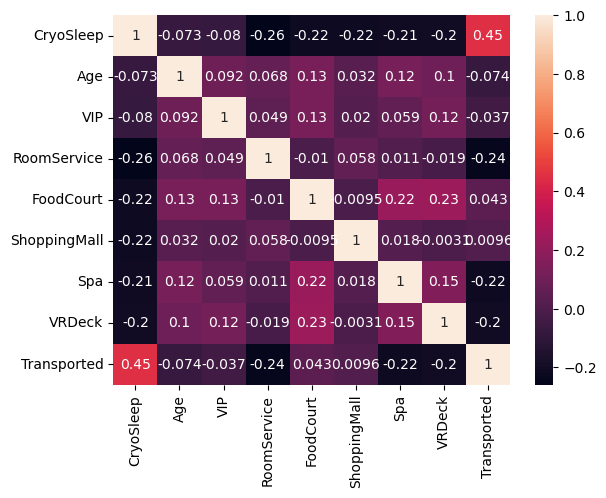

In [18]:
# We can observe any correlation between our variables using a heatmap.
sns.heatmap(df.corr(), annot= True)


## Model Building 

In [19]:
df.dtypes

HomePlanet       object
CryoSleep       float64
Cabin            object
Destination      object
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Deck             object
Side             object
dtype: object

In [20]:
# We must use One Hot encoding to trun our catagorical data into a numercial one. 
train_df = pd.get_dummies(df)


In [21]:
#We can now split the data into a training and a test set. 
from sklearn.model_selection import train_test_split

X = train_df.drop('Transported', axis =1)
Y = train_df['Transported']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [22]:
#We will import a few models/methods from sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
#Logistic Regression

lr=LogisticRegression()
lr.fit(X_train, Y_train)
logreg_score = lr.score(X_test, Y_test)
print(logreg_score)

0.7711328349626222


/Users/srihithdonepudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#Now we can see our score for the test data
logreg_score = logreg_cv.score(X_test, Y_test)

Logistic regression has a low accuracy on the test set. we can try a different approach

In [26]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


GradientBoostingClassifier()

In [27]:
gbc_score = gbc.score(X_test,Y_test)
print(gbc_score)

0.7849338700402531


In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
svc_score = svc.score(X_test,Y_test)
print(svc_score)

0.7768832662449684


In [29]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_score = rf.score(X_test,Y_test)
print(rf_score)

0.7849338700402531


In [30]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,Y_train)
kn_score = kn.score(X_test,Y_test)
print(kn_score)

0.7745830937320299


In [37]:
import matplotlib.pyplot as plt

df_scores = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM', 'KNeighbors'],scores= [logreg_score, rf_score,gbc_score, svc_score, kn_score]))

df_scores


,model,scores
0,Logistic Regression,0.771133
1,Random Forest,0.784934
2,Gradient Boosting,0.784934
3,SVM,0.776883
4,KNeighbors,0.774583


As we can see gradient boosting has the highest accuracy so we will use that to predict our values. 